In [1]:
import numpy as np
from numpy import nan
import pandas as pd
import peakutils
from peakutils.plot import plot as pplot
from matplotlib import pyplot as plt
import seaborn as sns
import statistics
%matplotlib inline

In [2]:
file_list = ['Normalized_data/A364a_WT_exp1_new.csv',
             'Normalized_data/A364a_WT_exp2_new.csv',
             'Normalized_data/A364a_rad53_exp1_new.csv',
             'Normalized_data/A364a_rad53_exp2_new.csv',
             'Normalized_data/W303_WT_exp1_new.csv',
             'Normalized_data/W303_WT_exp2_new.csv',
             'Normalized_data/W303_rad53_exp1_new.csv',
             'Normalized_data/W303_rad53_exp2_new.csv']

In [3]:
def ssDNA_peaks1(a):  
    import numpy as np
    from numpy import nan
    import pandas as pd
    import peakutils
    from peakutils.plot import plot as pplot
    import statistics
    

    df1 = pd.read_csv(a, sep=",")

    cols = ['Coord', 'ssDNA']
    chr1 = df1[['Coordinates (kb)', 'Chr1_ssDNA_new']]
    chr1 = chr1.dropna()
    #chr1[chr1 < 0] = nan
    chr1.columns = cols
    chr1['chromosome'] = 1

    chr2 = df1[['Coordinates (kb)', 'Chr2_ssDNA_new']]
    chr2 = chr2.dropna()
    #chr2[chr2 < 0] = nan
    chr2.columns = cols
    chr2['chromosome'] = 2

    chr3 = df1[['Coordinates (kb)', 'Chr3_ssDNA_new']]
    chr3 = chr3.dropna()
    #chr3[chr3 < 0] = nan
    chr3.columns = cols
    chr3['chromosome'] = 3

    chr4 = df1[['Coordinates (kb)', 'Chr4_ssDNA_new']]
    chr4 = chr4.dropna()
    #chr4[chr4 < 0] = nan
    chr4.columns = cols
    chr4['chromosome'] = 4

    chr5 = df1[['Coordinates (kb)', 'Chr5_ssDNA_new']]
    chr5 = chr5.dropna()
    #chr5[chr5 < 0] = nan
    chr5.columns = cols
    chr5['chromosome'] = 5

    chr6 = df1[['Coordinates (kb)', 'Chr6_ssDNA_new']]
    chr6 = chr6.dropna()
    #chr6[chr6 < 0] = nan
    chr6.columns = cols
    chr6['chromosome'] = 6

    chr7 = df1[['Coordinates (kb)', 'Chr7_ssDNA_new']]
    chr7 = chr7.dropna()
    #chr7[chr7 < 0] = nan
    chr7.columns = cols
    chr7['chromosome'] = 7

    chr8 = df1[['Coordinates (kb)', 'Chr8_ssDNA_new']]
    chr8 = chr8.dropna()
    #chr8[chr8 < 0] = nan
    chr8.columns = cols
    chr8['chromosome'] = 8

    chr9 = df1[['Coordinates (kb)', 'Chr9_ssDNA_new']]
    chr9 = chr9.dropna()
    #chr9[chr9 < 0] = nan
    chr9.columns = cols
    chr9['chromosome'] = 9

    chr10 = df1[['Coordinates (kb)', 'Chr10_ssDNA_new']]
    chr10 = chr10.dropna()
    #chr10[chr10 < 0] = nan
    chr10.columns = cols
    chr10['chromosome'] = 10

    chr11 = df1[['Coordinates (kb)', 'Chr11_ssDNA_new']]
    chr11 = chr11.dropna()
    #chr11[chr11 < 0] = nan
    chr11.columns = cols
    chr11['chromosome'] = 11

    chr12 = df1[['Coordinates (kb)', 'Chr12_ssDNA_new']]
    chr12 = chr12.dropna()
    #chr12[chr12 < 0] = nan
    chr12.columns = cols
    chr12['chromosome'] = 12

    chr13 = df1[['Coordinates (kb)', 'Chr13_ssDNA_new']]
    chr13 = chr13.dropna()
    #chr13[chr13 < 0] = nan
    chr13.columns = cols
    chr13['chromosome'] = 13

    chr14 = df1[['Coordinates (kb)', 'Chr14_ssDNA_new']]
    chr14 = chr14.dropna()
    #chr14[chr14 < 0] = nan
    chr14.columns = cols
    chr14['chromosome'] = 14

    chr15 = df1[['Coordinates (kb)', 'Chr15_ssDNA_new']]
    chr15 = chr15.dropna()
    #chr15[chr15 < 0] = nan
    chr15.columns = cols
    chr15['chromosome'] = 15

    chr16 = df1[['Coordinates (kb)', 'Chr16_ssDNA_new']]
    chr16 = chr16.dropna()
    #chr16[chr16 < 0] = nan
    chr16.columns = cols
    chr16['chromosome'] = 16

    All_chro = pd.concat([chr1, chr2, chr3, chr4, chr5, chr6, chr7, chr8, chr9, chr10])
    All_chro = pd.concat([All_chro, chr11, chr12, chr13, chr14, chr15, chr16])
    All_chro = All_chro.reset_index(drop=True)



    Med = statistics.median(All_chro['ssDNA'])

    mylist = []
    for ss in All_chro['ssDNA']:
        if ss < Med:
            mylist.append(ss)
    subdata = np.array(mylist)

    mylist_std = statistics.stdev(mylist)

    Cutoff = Med + mylist_std*3

    thres_percentage = (Cutoff - All_chro['ssDNA'].min())/(All_chro['ssDNA'].max() - All_chro['ssDNA'].min())

    Min_dist_testing_list = [1, 2, 4, 6, 8, 10]

    for y in Min_dist_testing_list:

        indexes = peakutils.indexes(All_chro['ssDNA'], thres=thres_percentage, min_dist=y)

        print("name: {}".format(a), " ", y, " ", len(indexes))

        Peak_list = ["Index", "Chromosome", "Coord_kb", "ssDNA"]
        j = 0
        while j < len(indexes):
            arr = np.array([indexes[j], All_chro['chromosome'][indexes[j]], All_chro['Coord'][indexes[j]], All_chro['ssDNA'][indexes[j]]])
            Peak_list = np.vstack((Peak_list, arr))
            j += 1

        df2 = pd.DataFrame(Peak_list)
        df2.to_csv("Identified_ssDNA_Peaks/Min_dist_{}_{}.csv".format(y, a[16:]), header=None,index=False)

In [4]:
for x in file_list:
    ssDNA_peaks1(x)

name: Normalized_data/A364a_WT_exp1_new.csv   1   322
name: Normalized_data/A364a_WT_exp1_new.csv   2   317
name: Normalized_data/A364a_WT_exp1_new.csv   4   314
name: Normalized_data/A364a_WT_exp1_new.csv   6   309
name: Normalized_data/A364a_WT_exp1_new.csv   8   300
name: Normalized_data/A364a_WT_exp1_new.csv   10   271
name: Normalized_data/A364a_WT_exp2_new.csv   1   257
name: Normalized_data/A364a_WT_exp2_new.csv   2   256
name: Normalized_data/A364a_WT_exp2_new.csv   4   250
name: Normalized_data/A364a_WT_exp2_new.csv   6   246
name: Normalized_data/A364a_WT_exp2_new.csv   8   232
name: Normalized_data/A364a_WT_exp2_new.csv   10   219
name: Normalized_data/A364a_rad53_exp1_new.csv   1   456
name: Normalized_data/A364a_rad53_exp1_new.csv   2   454
name: Normalized_data/A364a_rad53_exp1_new.csv   4   445
name: Normalized_data/A364a_rad53_exp1_new.csv   6   441
name: Normalized_data/A364a_rad53_exp1_new.csv   8   434
name: Normalized_data/A364a_rad53_exp1_new.csv   10   427
name: N

In [5]:
Mid_Dist = [1, 2, 4, 6, 8, 10]
file_name = []
for x in Mid_Dist:
    for y in file_list:
        file_name.append("Min_dist_"+ str(x) +"_"+y[16:]+".csv")

In [6]:
 def PeakBed(x):
        df3 = pd.read_csv("Identified_ssDNA_Peaks/{}".format(x), sep=",")
        df3['Chromosome'] = df3['Chromosome'].astype(int)
        df3['Index'] = df3['Index'].astype(int)

        df4= df3[['Index','Chromosome', 'Coord_kb', 'ssDNA']]

        df4['Start'] = (df4['Coord_kb'])*1000
        df4['end'] = (df4['Coord_kb'])*1000

        df4['Chromosome'] = df4['Chromosome'].astype(str)
        df4['Coord_kb'] = df4['Coord_kb'].astype(str)
        df4['Start'] = df4['Start'].astype(int)
        df4['end'] = df4['end'].astype(int)
        df4['Chr'] = "chr" + df4['Chromosome']
        df4['Description'] = "PeakIndex" + df4['Coord_kb'] + ":" + df4['ssDNA'].astype(str)

        df5 = df4[['Chr', 'Start', 'end', 'Description']]

        df5.to_csv("Identified_ssDNA_Peaks/Peak_bed/{}.bed".format(x), header=None,index=None, sep='\t', mode = 'a')
        
        return len(df5.Start)

In [16]:
Total_Peak = []
for x in file_name:
    a = PeakBed(x)
    dic = {x : a}
    Total_Peak.append(dic.copy())
Total_Peak

[{'Min_dist_1_A364a_WT_exp1_new.csv.csv': 322},
 {'Min_dist_1_A364a_WT_exp2_new.csv.csv': 257},
 {'Min_dist_1_A364a_rad53_exp1_new.csv.csv': 456},
 {'Min_dist_1_A364a_rad53_exp2_new.csv.csv': 504},
 {'Min_dist_1_W303_WT_exp1_new.csv.csv': 207},
 {'Min_dist_1_W303_WT_exp2_new.csv.csv': 263},
 {'Min_dist_1_W303_rad53_exp1_new.csv.csv': 489},
 {'Min_dist_1_W303_rad53_exp2_new.csv.csv': 473},
 {'Min_dist_2_A364a_WT_exp1_new.csv.csv': 317},
 {'Min_dist_2_A364a_WT_exp2_new.csv.csv': 256},
 {'Min_dist_2_A364a_rad53_exp1_new.csv.csv': 454},
 {'Min_dist_2_A364a_rad53_exp2_new.csv.csv': 501},
 {'Min_dist_2_W303_WT_exp1_new.csv.csv': 206},
 {'Min_dist_2_W303_WT_exp2_new.csv.csv': 258},
 {'Min_dist_2_W303_rad53_exp1_new.csv.csv': 487},
 {'Min_dist_2_W303_rad53_exp2_new.csv.csv': 471},
 {'Min_dist_4_A364a_WT_exp1_new.csv.csv': 314},
 {'Min_dist_4_A364a_WT_exp2_new.csv.csv': 250},
 {'Min_dist_4_A364a_rad53_exp1_new.csv.csv': 445},
 {'Min_dist_4_A364a_rad53_exp2_new.csv.csv': 497},
 {'Min_dist_4_W303

In [ ]:
df6 = pd.read_csv('origins_oridb.txt', sep="\t")

expansion = [100, 250, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000]

for y in expansion:
    df6['start'] = df6['Mid_point'] - y
    df6['end'] = df6['Mid_point'] + y
    num = df6._get_numeric_data()
    num[num < 0] = 0
    df6['chro'] = "chr" + df6['chr'].astype(str)
    df6['start'] = df6['start'].astype(int)
    df6['end'] = df6['end'].astype(int)
    origins = df6[['chro', 'start', 'end', 'name']]
    origins.to_csv("Identified_ssDNA_Peaks/Peak_bed/ori{}.bed".format(y), header=None,index=None, sep='\t', mode = 'a')

In [ ]:
%%bash
pwd
cd Identified_ssDNA_Peaks/Peak_bed
pwd
for ori in ori*.bed
do
    for peak in Min_dist_*.csv.csv.bed
    do
        bedtools intersect -a ${ori} -b ${peak} -wa -wb> Asso/${ori}_${peak}.txt
    done
done
       

In [ ]:
expansion = [100, 250, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000]
Peak_dist = pd.DataFrame()
Origin_dist = pd.DataFrame()
for expa in expansion:
    for file in file_name:
        dfop = pd.read_csv("Identified_ssDNA_Peaks/Peak_bed/Asso/ori{}.bed_{}.bed.txt".format(expa, file), header = None, sep="\t")
        col_op = ['Ori_chr', 'Ori_start', 'Ori_end', 'Ori_name', 'Peak_chr', 'Peak_start', 'Peak_end', 'Peak_name']
        dfop.columns = col_op
        dfop['Peak'] =dfop['Peak_chr'] + ':' + dfop['Peak_start'].astype(str) + '-' + dfop['Peak_end'].astype(str) + ':' + dfop['Peak_name']
        ddfop = pd.DataFrame()
        ddfop['Peak'] = dfop['Peak']
        ap = pd.DataFrame(ddfop['Peak'].value_counts())
        bp= pd.DataFrame(ap['Peak'].value_counts())
        bp['expation'] = expa
        bp['strain'] = file
        Origin_dist = Origin_dist.append(bp)
        dfop['Ori'] =dfop['Ori_chr'] + ':' + dfop['Ori_start'].astype(str) + '-' + dfop['Ori_end'].astype(str) + ':' + dfop['Ori_name']
        dpfop = pd.DataFrame()
        dpfop['Ori'] = dfop['Ori']
        ao = pd.DataFrame(dpfop['Ori'].value_counts())
        bo= pd.DataFrame(ao['Ori'].value_counts())
        bo['expation'] = expa
        bo['strain'] = file
        Peak_dist = Peak_dist.append(bo)
        #print(bo)
        #print("********")
        #print(bp)
Peak_dist.to_csv("Identified_ssDNA_Peaks/Peak_bed/Asso/Dist/Peak_dist.txt", sep='\t')
Origin_dist.to_csv("Identified_ssDNA_Peaks/Peak_bed/Asso/Dist/Origin_dist.txt", sep='\t')

In [2]:
All_Asso_ori = pd.read_csv('Identified_ssDNA_Peaks/Peak_bed/Asso/OriANA_ori2000/Fired_origins.txt', sep="\t")

A364a_WT_1 = All_Asso_ori['A364a_WT_1']
A364a_WT_1 = A364a_WT_1.dropna()

A364a_rad53_1 = All_Asso_ori['A364a_rad53_1']
A364a_rad53_1 = A364a_rad53_1.dropna()

A364a_WT_2 = All_Asso_ori['A364a_WT_2']
A364a_WT_2 = A364a_WT_2.dropna()

A364a_rad53_2 = All_Asso_ori['A364a_rad53_2']
A364a_rad53_2 = A364a_rad53_2.dropna()

W303_WT_1 = All_Asso_ori['W303_WT_1']
W303_WT_1 = W303_WT_1.dropna()

W303_rad53_1 = All_Asso_ori['W303_rad53_1']
W303_rad53_1 = W303_rad53_1.dropna()
#pd.options.display.max_rows = 999
#print(W303_rad53_1)

W303_WT_2 = All_Asso_ori['W303_WT_2']
W303_WT_2 = W303_WT_2.dropna()

W303_rad53_2 = All_Asso_ori['W303_rad53_2']
W303_rad53_2 = W303_rad53_2.dropna()



In [4]:
A364a_WT = list(set(A364a_WT_1).intersection(A364a_WT_2))
A364a_WT = pd.DataFrame(A364a_WT)
A364a_WT.columns = ['A364a_WT']
A364a_WT.to_csv("Identified_ssDNA_Peaks/Peak_bed/Asso/OriANA/A364a_WT_common.txt",index=None, sep='\t')

A364a_rad53 = list(set(A364a_rad53_1).intersection(A364a_rad53_2))
A364a_rad53 = pd.DataFrame(A364a_rad53)
A364a_rad53.columns = ['A364a_rad53']
A364a_rad53.to_csv("Identified_ssDNA_Peaks/Peak_bed/Asso/OriANA/A364a_rad53_common.txt",index=None, sep='\t')

W303_WT = list(set(W303_WT_1).intersection(W303_WT_2))
W303_WT = pd.DataFrame(W303_WT)
W303_WT.columns = ['W303_WT']
W303_WT.to_csv("Identified_ssDNA_Peaks/Peak_bed/Asso/OriANA/W303_WT_common.txt",index=None, sep='\t')

W303_rad53 = list(set(W303_rad53_1).intersection(W303_rad53_2))
W303_rad53 = pd.DataFrame(W303_rad53)
W303_rad53.columns = ['W303_rad53']
W303_rad53.to_csv("Identified_ssDNA_Peaks/Peak_bed/Asso/OriANA/W303_rad53_common.txt", index=None, sep='\t')



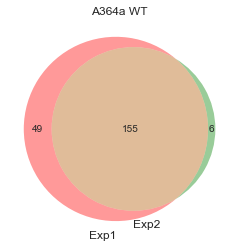

In [5]:
from matplotlib_venn import venn2
venn2([set(A364a_WT_1), set(A364a_WT_2)], ('Exp1', 'Exp2'))
plt.title("A364a WT")
plt.show()


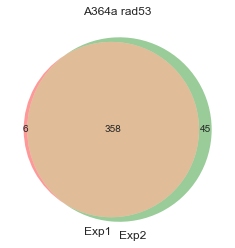

In [6]:
venn2([set(A364a_rad53_1), set(A364a_rad53_2)], ('Exp1', 'Exp2'))
plt.title("A364a rad53")
plt.show()

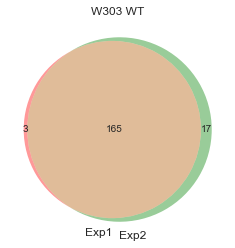

In [7]:
venn2([set(W303_WT_1), set(W303_WT_2)], ('Exp1', 'Exp2'))
plt.title("W303 WT")
plt.show()

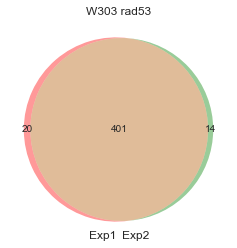

In [8]:
venn2([set(W303_rad53_1), set(W303_rad53_2)], ('Exp1', 'Exp2'))
plt.title("W303 rad53")
plt.show()

In [9]:
merge1 = pd.merge(A364a_WT, A364a_rad53, how = 'outer', left_on = 'A364a_WT', right_on = 'A364a_rad53')
merge1.to_csv("Identified_ssDNA_Peaks/Peak_bed/Asso/OriANA/A364A_origins.txt",index=None, sep='\t')
merge2 = pd.merge(W303_WT, W303_rad53, how = 'outer', left_on = 'W303_WT', right_on = 'W303_rad53')
merge2.to_csv("Identified_ssDNA_Peaks/Peak_bed/Asso/OriANA/W303_origins.txt",index=None, sep='\t')

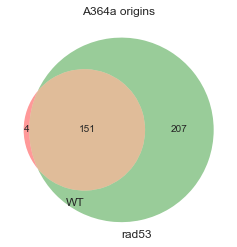

In [10]:
A364a_WT = list(set(A364a_WT_1).intersection(A364a_WT_2))
A364a_rad53 = list(set(A364a_rad53_1).intersection(A364a_rad53_2))

venn2([set(A364a_WT), set(A364a_rad53)], ('WT', 'rad53'))
plt.title("A364a origins")
plt.show()

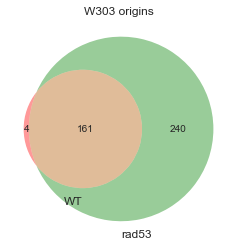

In [11]:
W303_WT = list(set(W303_WT_1).intersection(W303_WT_2))
W303_rad53 = list(set(W303_rad53_1).intersection(W303_rad53_2))

venn2([set(W303_WT), set(W303_rad53)], ('WT', 'rad53'))
plt.title("W303 origins")
plt.show()

In [2]:
import pybedtools

In [16]:
strain_specific_ori_cl = pybedtools.BedTool("""
                        chr1 649 1791
                        chr1 16854 17565
                        chr1 161999 170000
                        chr1 176153 176402
                        chr2 28932 29152
                        chr2 177528 177877
                        chr2 187204 187915
                        chr2 254889 255136
                        chr2 611268 613200
                        chr2 675946 676667
                        chr3 11302 14854
                        chr3 14573 14849
                        chr3 14869 15213
                        chr3 15212 16274
                        chr3 30198 30657
                        chr3 114313 114933
                        chr3 203875 207534
                        chr3 292523 292826
                        chr3 304362 311363
                        chr4 232139 232618
                        chr4 235934 236184
                        chr4 719872 721227
                        chr4 875790 882791
                        chr4 1454011 1455590
                        chr5 6463 7230
                        chr5 11712 12194
                        chr5 17066 19023
                        chr5 108552 110467
                        chr5 276126 276526
                        chr5 301564 302061
                        chr6 22 1527
                        chr6 127744 128066
                        chr7 31979 34434
                        chr7 114384 115095
                        chr7 170772 172017
                        chr7 318744 319455
                        chr7 568489 568738
                        chr7 1082958 1084336
                        chr8 5157 6168
                        chr8 9710 11566
                        chr8 94758 95192
                        chr8 111292 111766
                        chr8 213178 213861
                        chr8 214884 215595
                        chr8 535402 535836
                        chr8 550162 551317
                        chr9 405632 407617
                        chr10 99358 99796
                        chr10 248599 249300
                        chr10 454275 455248
                        chr10 643812 644767
                        chr11 22 2746
                        chr11 7396 9007
                        chr11 196037 196284
                        chr11 500414 501125
                        chr12 222409 222792
                        chr12 458825 459141
                        chr12 687248 687738
                        chr12 1013788 1014017
                        chr12 1059485 1059919
                        chr12 1062397 1065752
                        chr13 8790 10699
                        chr13 420428 421629
                        chr14 6281 10914
                        chr14 567714 569020
                        chr14 764000 764500
                        chr15 9760 12672
                        chr15 699499 709500
                        chr15 997702 999357
                        chr15 1022547 1023652
                        chr16 178642 179827
                        chr16 297812 299287
                        chr16 303432 305027
                        chr16 376722 377937
                        chr16 414031 416072
                        chr16 498852 500557
                        """, from_string=True)



In [17]:
fasta = pybedtools.BedTool('Sequence/sacCer1_fasta/sacCer1.fa')

In [18]:
strain_specific_ori_cl = strain_specific_ori_cl.sequence(fi=fasta, s=True)

In [19]:
a = open(strain_specific_ori_cl.seqfn).read()

In [20]:
with open("Sequence/strain_specific_ori_cl.fa", 'w') as f:
    f.write(a)
f.close()

In [21]:
%%bash

blastn -query Sequence/strain_specific_ori_cl.fa -db ~/db/blast/S288C_R64_2_1/S288C_R64_2_1 -out Sequence/strain_specific_ori_cl_071117.xml -evalue 0.001 -outfmt 5

In [13]:
from xml.dom import minidom

In [22]:
xmldoc = minidom.parse("Sequence/strain_specific_ori_cl_071117.xml")

In [23]:
blast_iterations = xmldoc.getElementsByTagName("BlastOutput_iterations")[0]
iterations = blast_iterations.getElementsByTagName("Iteration")
data = []
for interation in iterations:
    query = str(interation.getElementsByTagName("Iteration_query-def")[0].firstChild.data)
    query_len = int(interation.getElementsByTagName("Iteration_query-len")[0].firstChild.data)
    #print(query, query_len)
    iteration_hits = interation.getElementsByTagName("Iteration_hits")[0]
    hits = iteration_hits.getElementsByTagName("Hit")
    for hit in hits:
        hit_num = int(hit.getElementsByTagName("Hit_num")[0].firstChild.data)
        hit_desc = str(hit.getElementsByTagName("Hit_def")[0].firstChild.data)
        hit_len = int(hit.getElementsByTagName("Hit_len")[0].firstChild.data)
        hit_hsps = hit.getElementsByTagName("Hit_hsps")
        #print(hit_num, hit_desc)
        for hit_hsp in hit_hsps:
            hsps = hit_hsp.getElementsByTagName("Hsp")
            for hsp in hsps:
                hsp_num = int(hit.getElementsByTagName("Hsp_num")[0].firstChild.data)
                query_from = int(hit.getElementsByTagName("Hsp_query-from")[0].firstChild.data)
                query_to = int(hit.getElementsByTagName("Hsp_query-to")[0].firstChild.data)
                hit_from = int(hit.getElementsByTagName("Hsp_hit-from")[0].firstChild.data)
                hit_to = int(hit.getElementsByTagName("Hsp_hit-to")[0].firstChild.data)
                align_len = int(hit.getElementsByTagName("Hsp_align-len")[0].firstChild.data)
                Hsp_qseq = str(hit.getElementsByTagName("Hsp_qseq")[0].firstChild.data)
                Hsp_hseq = str(hit.getElementsByTagName("Hsp_hseq")[0].firstChild.data)
                Hsp_midline = str(hit.getElementsByTagName("Hsp_midline")[0].firstChild.data)
                dt = []
                dt.extend((query, query_len, hit_num, hit_desc, hsp_num, query_from, query_to, hit_from, hit_to, align_len, Hsp_qseq, Hsp_hseq, Hsp_midline))
                data.append(dt)
col = ['Query', 'Query_length', 'Hit_num', 'Hit_description','Hsp_num', 'Query_from', 'Query_to', 'Hit_from', 'Hit_to', 'Alignment_length', 'Query_seq', 'Hit_seq', 'Midline']

data = pd.DataFrame(data)
data.columns = col
print(data.shape)
data.drop_duplicates(keep='first')
print(data.shape)
data.to_csv("Sequence/strain_specific_ori_cl_071117.txt", index=False, sep='\t')

(1685, 13)
(1685, 13)


In [24]:
strain_specific_ori_cl = pybedtools.BedTool("""
ref|NC_001133| 649 1791
ref|NC_001133| 16851 17562
ref|NC_001133| 161999 170005
ref|NC_001134| 28940 29160
ref|NC_001134| 177566 177915
ref|NC_001134| 187242 187953
ref|NC_001134| 611313 613245
ref|NC_001134| 675991 676712
ref|NC_001135| 11302 14854
ref|NC_001135| 14573 14849
ref|NC_001135| 14869 15213
ref|NC_001135| 15212 16274
ref|NC_001135| 30198 30657
ref|NC_001135| 114319 114939
ref|NC_001135| 203883 207542
ref|NC_001135| 292530 292833
ref|NC_001135| 304369 311370
ref|NC_001136| 232139 232618
ref|NC_001136| 235935 236185
ref|NC_001136| 719879 721234
ref|NC_001136| 875798 882799
ref|NC_001136| 1454023 1455602
ref|NC_001137| 6463 7230
ref|NC_001137| 11712 12194
ref|NC_001137| 17066 19023
ref|NC_001137| 108552 110467
ref|NC_001137| 301566 302063
ref|NC_001138| 22 1527
ref|NC_001138| 127749 128071
ref|NC_001139| 31979 34434
ref|NC_001139| 114382 115093
ref|NC_001139| 170768 172013
ref|NC_001139| 318743 319454
ref|NC_001139| 568488 568737
ref|NC_001139| 1082954 1084332
ref|NC_001140| 5158 6169
ref|NC_001140| 9712 11568
ref|NC_001140| 94763 95197
ref|NC_001140| 111299 111773
ref|NC_001140| 213178 213861
ref|NC_001140| 212886 213597
ref|NC_001140| 535406 535840
ref|NC_001140| 550166 551321
ref|NC_001141| 405635 407620
ref|NC_001142| 99365 99797
ref|NC_001142| 248903 249604
ref|NC_001142| 454582 455555
ref|NC_001142| 644117 645072
ref|NC_001143| 22 2745
ref|NC_001143| 7395 9006
ref|NC_001143| 196040 196287
ref|NC_001143| 500777 501488
ref|NC_001144| 458824 459140
ref|NC_001144| 687248 687738
ref|NC_001144| 1013793 1014022
ref|NC_001144| 1059489 1059923
ref|NC_001144| 1062401 1065756
ref|NC_001145| 8790 10698
ref|NC_001145| 420429 421630
ref|NC_001146| 6281 10914
ref|NC_001146| 567718 569024
ref|NC_001146| 764005 764505
ref|NC_001147| 9761 12673
ref|NC_001147| 997709 999364
ref|NC_001147| 1022553 1023658
ref|NC_001148| 178643 179828
ref|NC_001148| 297813 299288
ref|NC_001148| 303433 305028
ref|NC_001148| 376727 377942
ref|NC_001148| 414036 416077
ref|NC_001148| 498856 500561
""", from_string=True)



In [25]:
fasta_string = pybedtools.BedTool("Sequence/R64_2_1/S288C_R64_2_1.fsa")
strain_specific_ori_cl = strain_specific_ori_cl.sequence(fi=fasta_string, s=True)
a = open(strain_specific_ori_cl.seqfn).read()
with open("Sequence/strain_specific_ori_cl_update.fa", 'w') as f:
    f.write(a)
f.close()

In [26]:
%%bash
pwd

/Users/jiepeng/Documents/exp_data/Rad53/ssDNA_strain_diff_JP/even_250_data/data_analysis


In [27]:
%%bash
cd Sequence/
blastn -query strain_specific_ori_cl_update.fa -db ~/db/blast/W303/W303 -out output/To_W303/strain_specific_ori_cl_W303.xml -evalue 0.001 -outfmt 5

blastn -query strain_specific_ori_cl_update.fa -db ~/db/blast/A364a/A364a -out output/To_A364a/strain_specific_ori_cl_A364a.xml -evalue 0.001 -outfmt 5

In [29]:
xmldoc = minidom.parse("Sequence/output/To_A364a/strain_specific_ori_cl_A364a.xml")
blast_iterations = xmldoc.getElementsByTagName("BlastOutput_iterations")[0]
iterations = blast_iterations.getElementsByTagName("Iteration")
data = []
for interation in iterations:
    query = str(interation.getElementsByTagName("Iteration_query-def")[0].firstChild.data)
    query_len = int(interation.getElementsByTagName("Iteration_query-len")[0].firstChild.data)
    #print(query, query_len)
    iteration_hits = interation.getElementsByTagName("Iteration_hits")[0]
    hits = iteration_hits.getElementsByTagName("Hit")
    for hit in hits:
        hit_num = int(hit.getElementsByTagName("Hit_num")[0].firstChild.data)
        hit_desc = str(hit.getElementsByTagName("Hit_def")[0].firstChild.data)
        hit_len = int(hit.getElementsByTagName("Hit_len")[0].firstChild.data)
        hit_hsps = hit.getElementsByTagName("Hit_hsps")
        #print(hit_num, hit_desc)
        for hit_hsp in hit_hsps:
            hsps = hit_hsp.getElementsByTagName("Hsp")
            for hsp in hsps:
                hsp_num = int(hit.getElementsByTagName("Hsp_num")[0].firstChild.data)
                query_from = int(hit.getElementsByTagName("Hsp_query-from")[0].firstChild.data)
                query_to = int(hit.getElementsByTagName("Hsp_query-to")[0].firstChild.data)
                hit_from = int(hit.getElementsByTagName("Hsp_hit-from")[0].firstChild.data)
                hit_to = int(hit.getElementsByTagName("Hsp_hit-to")[0].firstChild.data)
                align_len = int(hit.getElementsByTagName("Hsp_align-len")[0].firstChild.data)
                Hsp_qseq = str(hit.getElementsByTagName("Hsp_qseq")[0].firstChild.data)
                Hsp_hseq = str(hit.getElementsByTagName("Hsp_hseq")[0].firstChild.data)
                Hsp_midline = str(hit.getElementsByTagName("Hsp_midline")[0].firstChild.data)
                dt = []
                dt.extend((query, query_len, hit_num, hit_desc, hsp_num, query_from, query_to, hit_from, hit_to, align_len, Hsp_qseq, Hsp_hseq, Hsp_midline))
                data.append(dt)
col = ['Query', 'Query_length', 'Hit_num', 'Hit_description','Hsp_num', 'Query_from', 'Query_to', 'Hit_from', 'Hit_to', 'Alignment_length', 'Query_seq', 'Hit_seq', 'Midline']

data = pd.DataFrame(data)
data.columns = col
print(data.shape)
data.drop_duplicates(keep='first')
print(data.shape)
data.to_csv("Sequence/output/To_A364a/strain_specific_ori_cl_A364a.txt", index=False, sep='\t')

(508, 13)
(508, 13)


In [30]:
xmldoc = minidom.parse("Sequence/output/To_W303/strain_specific_ori_cl_W303.xml")
blast_iterations = xmldoc.getElementsByTagName("BlastOutput_iterations")[0]
iterations = blast_iterations.getElementsByTagName("Iteration")
data = []
for interation in iterations:
    query = str(interation.getElementsByTagName("Iteration_query-def")[0].firstChild.data)
    query_len = int(interation.getElementsByTagName("Iteration_query-len")[0].firstChild.data)
    #print(query, query_len)
    iteration_hits = interation.getElementsByTagName("Iteration_hits")[0]
    hits = iteration_hits.getElementsByTagName("Hit")
    for hit in hits:
        hit_num = int(hit.getElementsByTagName("Hit_num")[0].firstChild.data)
        hit_desc = str(hit.getElementsByTagName("Hit_def")[0].firstChild.data)
        hit_len = int(hit.getElementsByTagName("Hit_len")[0].firstChild.data)
        hit_hsps = hit.getElementsByTagName("Hit_hsps")
        #print(hit_num, hit_desc)
        for hit_hsp in hit_hsps:
            hsps = hit_hsp.getElementsByTagName("Hsp")
            for hsp in hsps:
                hsp_num = int(hit.getElementsByTagName("Hsp_num")[0].firstChild.data)
                query_from = int(hit.getElementsByTagName("Hsp_query-from")[0].firstChild.data)
                query_to = int(hit.getElementsByTagName("Hsp_query-to")[0].firstChild.data)
                hit_from = int(hit.getElementsByTagName("Hsp_hit-from")[0].firstChild.data)
                hit_to = int(hit.getElementsByTagName("Hsp_hit-to")[0].firstChild.data)
                align_len = int(hit.getElementsByTagName("Hsp_align-len")[0].firstChild.data)
                Hsp_qseq = str(hit.getElementsByTagName("Hsp_qseq")[0].firstChild.data)
                Hsp_hseq = str(hit.getElementsByTagName("Hsp_hseq")[0].firstChild.data)
                Hsp_midline = str(hit.getElementsByTagName("Hsp_midline")[0].firstChild.data)
                dt = []
                dt.extend((query, query_len, hit_num, hit_desc, hsp_num, query_from, query_to, hit_from, hit_to, align_len, Hsp_qseq, Hsp_hseq, Hsp_midline))
                data.append(dt)
col = ['Query', 'Query_length', 'Hit_num', 'Hit_description','Hsp_num', 'Query_from', 'Query_to', 'Hit_from', 'Hit_to', 'Alignment_length', 'Query_seq', 'Hit_seq', 'Midline']

data = pd.DataFrame(data)
data.columns = col
print(data.shape)
data.drop_duplicates(keep='first')
print(data.shape)
data.to_csv("Sequence/output/To_W303/strain_specific_ori_cl_W303.txt", index=False, sep='\t')

(701, 13)
(701, 13)
